# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Bell_pepper/train",
    label_mode="categorical",
    class_names= ['Pepper bell Bacterial spot', 'Pepper bell healthy'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Bell_pepper/test",
    label_mode="categorical",
    class_names= ['Pepper bell Bacterial spot', 'Pepper bell healthy'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 4033 files belonging to 2 classes.
==========================Validation Data====================
Found 962 files belonging to 2 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Dataset/Bell_pepper/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Dataset/Bell_pepper/test",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 4033 images belonging to 2 classes.
Found 962 images belonging to 2 classes.


# Model Non Augmented Evaluating

## Model Dense121 Version 1 Bell-Paper Non Augmented

In [4]:
# Load model
Dense_Non_Aug1 = tf.keras.models.load_model('Modelling/Bell-Paper/Non Augmented/Saved Model/BellPaper_DenseNet_model1_Based_Non_Augmented')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug1 = Dense_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug1[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 10s 71ms/step - loss: 0.0085 - accuracy: 0.9979
Accuracy: 99.792099%
Loss: 0.850576%


==========================Confusion Matrix====================
49/49 [==============================] - 4s 48ms/step


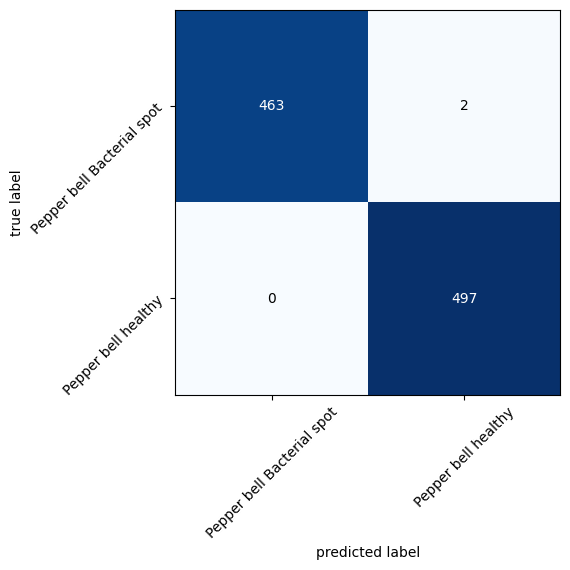

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [6]:
# Confusion Matrix and Classification Report
target_names = ['Pepper bell Bacterial spot', 'Pepper bell healthy']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Model Dense121 Version 2 Bell-Paper Non Augmented

In [7]:
# Load model
Dense_Non_Aug2 = tf.keras.models.load_model('Modelling/Bell-Paper/Non Augmented/Saved Model/BellPaper_DenseNet_model2_Based_Non_Augmented')

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug2 = Dense_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug2[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 5s 57ms/step - loss: 0.0031 - accuracy: 0.9990
Accuracy: 99.896049%
Loss: 0.309262%


==========================Confusion Matrix====================
49/49 [==============================] - 4s 55ms/step


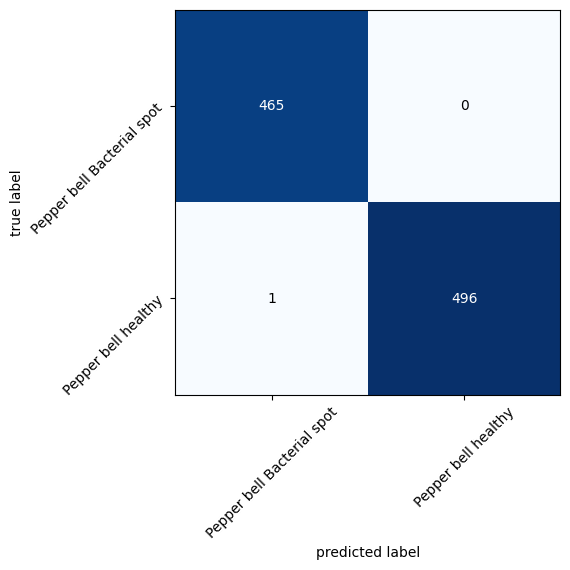

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [9]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## MobileNet V2 Version 1 Bell-Paper Non Augmented

In [10]:
# Load model
Mobile_Non_Aug1 = tf.keras.models.load_model('Modelling/Bell-Paper/Non Augmented/Saved Model/BellPaper_MobileNetV2_model1_Based_Non_Augmented')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug1 = Mobile_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug1[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 3s 34ms/step - loss: 5.0102e-05 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.005010%


==========================Confusion Matrix====================
49/49 [==============================] - 2s 28ms/step


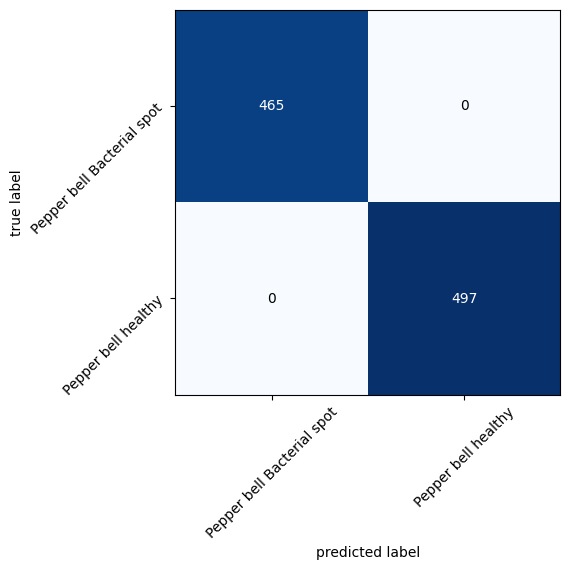

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [12]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## MobileNet V2 Version 2 Bell-Paper Non Augmented

In [13]:
# Load model
Mobile_Non_Aug2 = tf.keras.models.load_model('Modelling/Bell-Paper/Non Augmented/Saved Model/BellPaper_MobileNetV2_model2_Based_Non_Augmented')

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug2 = Mobile_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug2[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 2s 29ms/step - loss: 0.0010 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.104827%


==========================Confusion Matrix====================
49/49 [==============================] - 2s 33ms/step


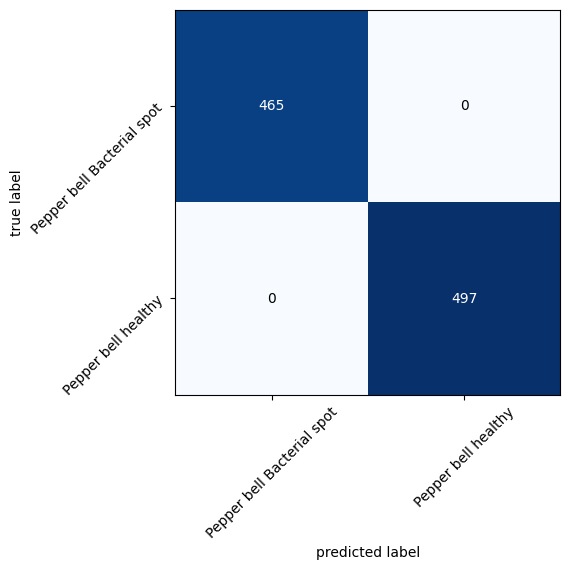

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [15]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## DIY Version 1 Bell-Paper Non Augmented

In [16]:
# Load model
DIY_Non_Aug1 = tf.keras.models.load_model('Modelling/Bell-Paper/Non Augmented/Saved Model/BellPaper_DIY_model1_Based_Non_Augmented')

In [17]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug1 = DIY_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug1[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 2s 34ms/step - loss: 0.0435 - accuracy: 0.9875
Accuracy: 98.752600%
Loss: 4.347447%


==========================Confusion Matrix====================
49/49 [==============================] - 2s 32ms/step


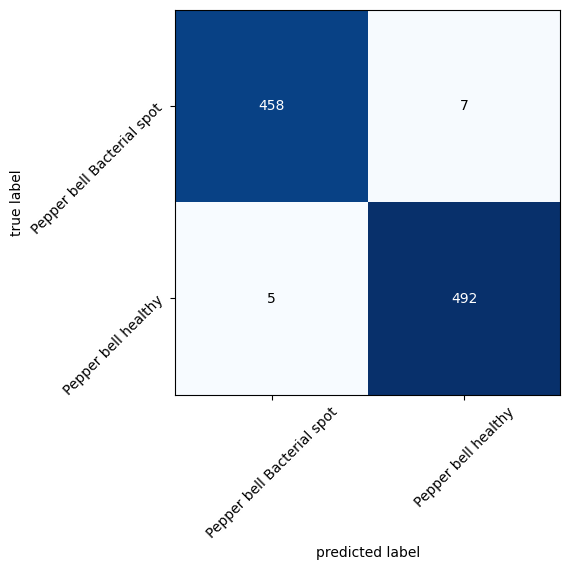

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       0.99      0.98      0.99       465
       Pepper bell healthy       0.99      0.99      0.99       497

                  accuracy                           0.99       962
                 macro avg       0.99      0.99      0.99       962
              weighted avg       0.99      0.99      0.99       962



In [18]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## DIY Version 2 Bell-Paper Non Augmented

In [19]:
# Load model
DIY_Non_Aug2 = tf.keras.models.load_model('Modelling/Bell-Paper/Non Augmented/Saved Model/BellPaper_DIY_model2_Based_Non_Augmented')

In [20]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug2 = DIY_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug2[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 2s 29ms/step - loss: 0.0790 - accuracy: 0.9823
Accuracy: 98.232847%
Loss: 7.902671%


==========================Confusion Matrix====================
49/49 [==============================] - 1s 28ms/step


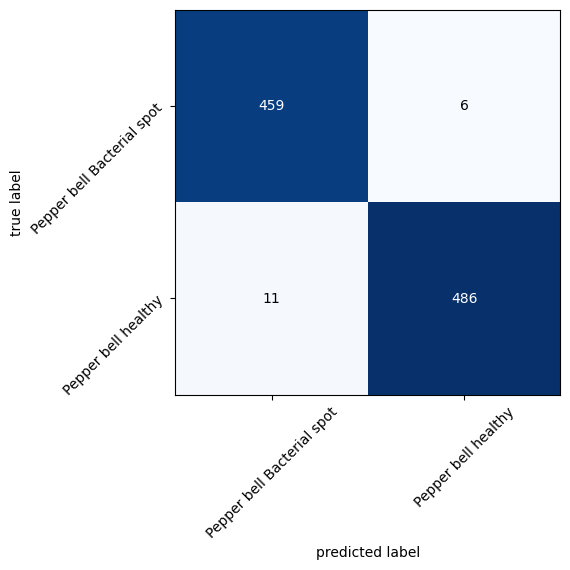

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       0.98      0.99      0.98       465
       Pepper bell healthy       0.99      0.98      0.98       497

                  accuracy                           0.98       962
                 macro avg       0.98      0.98      0.98       962
              weighted avg       0.98      0.98      0.98       962



In [21]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Xception Version 1 Bell-Paper Non Augmented

In [22]:
# Load model
Xception_Non_Aug1 = tf.keras.models.load_model("Modelling/Bell-Paper/Non Augmented/Saved Model/BellPaper_Xception_model1_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug1 = Xception_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug1[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 5s 65ms/step - loss: 0.0028 - accuracy: 0.9990
Accuracy: 99.896049%
Loss: 0.284149%


==========================Confusion Matrix====================
49/49 [==============================] - 3s 58ms/step


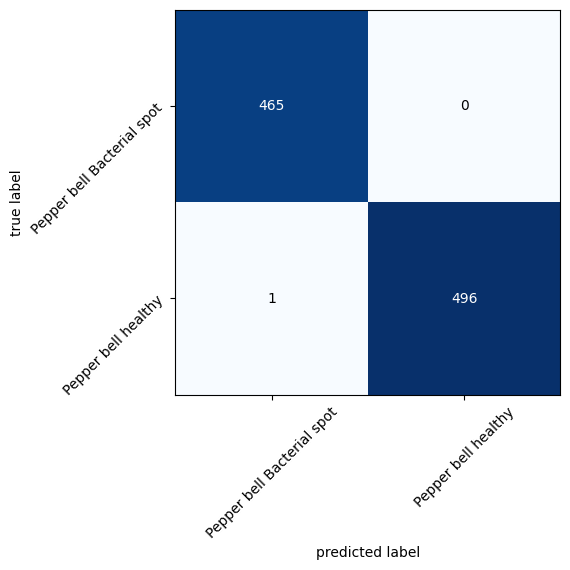

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [24]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Xception Version 2 Bell-Paper Non Augmented

In [25]:
# Load model
Xception_Non_Aug2 = tf.keras.models.load_model("Modelling/Bell-Paper/Non Augmented/Saved Model/BellPaper_Xception_model2_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug2 = Xception_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug2[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 4s 60ms/step - loss: 0.0029 - accuracy: 0.9990
Accuracy: 99.896049%
Loss: 0.290935%


==========================Confusion Matrix====================
49/49 [==============================] - 3s 57ms/step


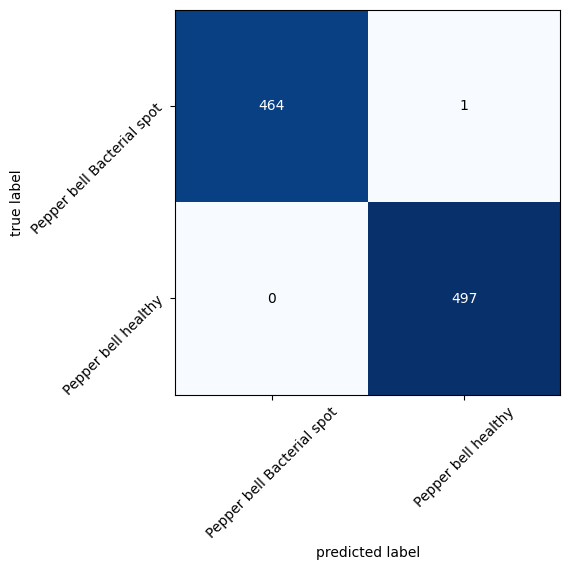

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [27]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Model Augmented Evaluating

## Model Dense121 Version 1 Bell-Paper Augmented

In [28]:
# Load model
Dense_Aug1 = tf.keras.models.load_model('Modelling/Bell-Paper/Augmented/Saved Model/BellPaper_DenseNet_model1_Based_Augmented')

In [29]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug1 = Dense_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug1[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 5s 57ms/step - loss: 0.0050 - accuracy: 0.9990
Accuracy: 99.896049%
Loss: 0.504370%


==========================Confusion Matrix====================
49/49 [==============================] - 4s 54ms/step


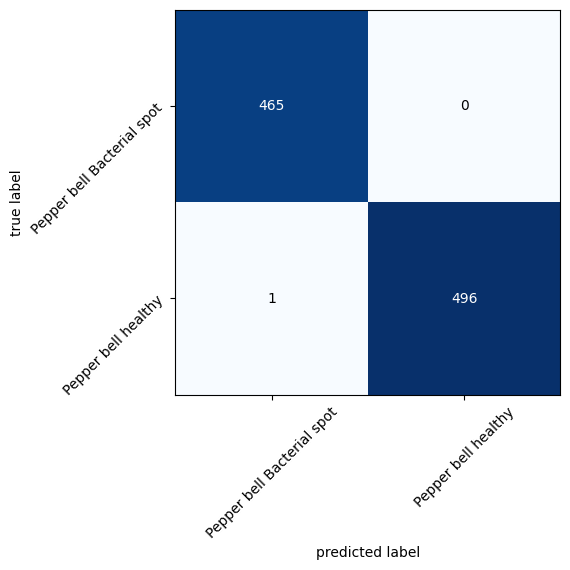

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [30]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Model Dense121 Version 2 Bell-Paper Augmented

In [31]:
# Load model
Dense_Aug2 = tf.keras.models.load_model('Modelling/Bell-Paper/Augmented/Saved Model/BellPaper_DenseNet_model2_Based_Augmented')

In [32]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug2 = Dense_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug2[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 6s 59ms/step - loss: 0.0021 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.205013%


==========================Confusion Matrix====================
49/49 [==============================] - 7s 56ms/step


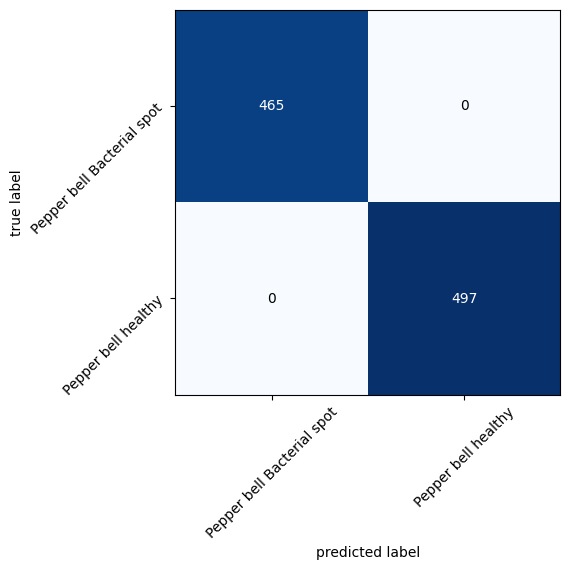

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [33]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## MobileNet V2 Version 1 Bell-Paper Non Augmented

In [34]:
# Load model
Mobile_Aug1 = tf.keras.models.load_model('Modelling/Bell-Paper/Augmented/Saved Model/BellPaper_MobileNetV2_model1_Based_Augmented')

In [35]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug1 = Mobile_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug1[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 3s 30ms/step - loss: 1.7902e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.017902%


==========================Confusion Matrix====================
49/49 [==============================] - 2s 28ms/step


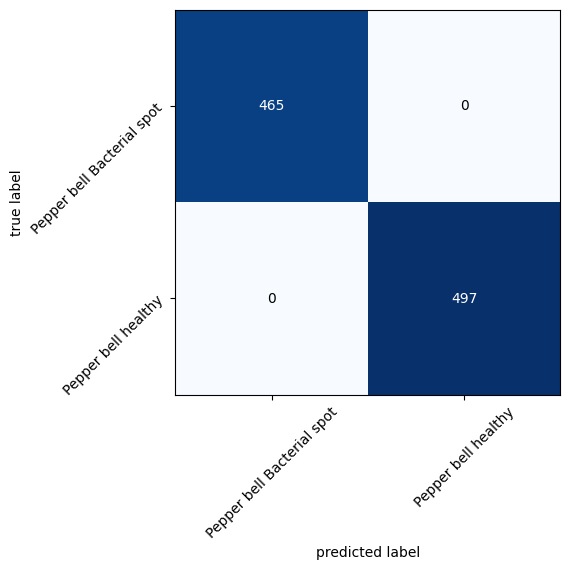

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [36]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## MobileNet V2 Version 2 Bell-Paper Non Augmented

In [37]:
# Load model
Mobile_Aug2 = tf.keras.models.load_model('Modelling/Bell-Paper/Augmented/Saved Model/BellPaper_MobileNetV2_model2_Based_Augmented')

In [38]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug2 = Mobile_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug2[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 2s 27ms/step - loss: 7.0645e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.070645%


==========================Confusion Matrix====================
49/49 [==============================] - 2s 29ms/step


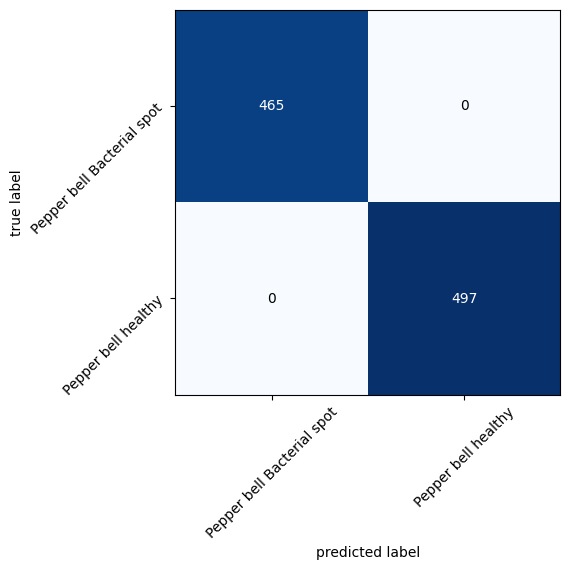

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [39]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Xception Version 1 Bell-Paper Augmented

In [40]:
# Load model
Xception_Aug1 = tf.keras.models.load_model("Modelling/Bell-Paper/Augmented/Saved Model/BellPaper_Xception_model1_Based_Augmented.h5", compile=False)
Xception_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug1 = Xception_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug1[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 4s 60ms/step - loss: 0.0016 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.160209%


==========================Confusion Matrix====================
49/49 [==============================] - 3s 57ms/step


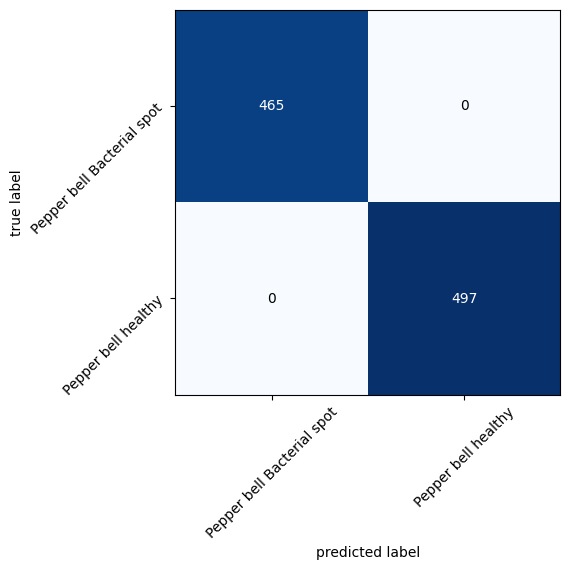

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [42]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Xception Version 2 Bell-Paper Augmented

In [43]:
# Load model
Xception_Aug2 = tf.keras.models.load_model("Modelling/Bell-Paper/Augmented/Saved Model/BellPaper_Xception_model2_Based_Augmented.h5", compile=False)
Xception_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug2 = Xception_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug2[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 4s 61ms/step - loss: 0.0122 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 1.221309%


==========================Confusion Matrix====================
49/49 [==============================] - 4s 57ms/step


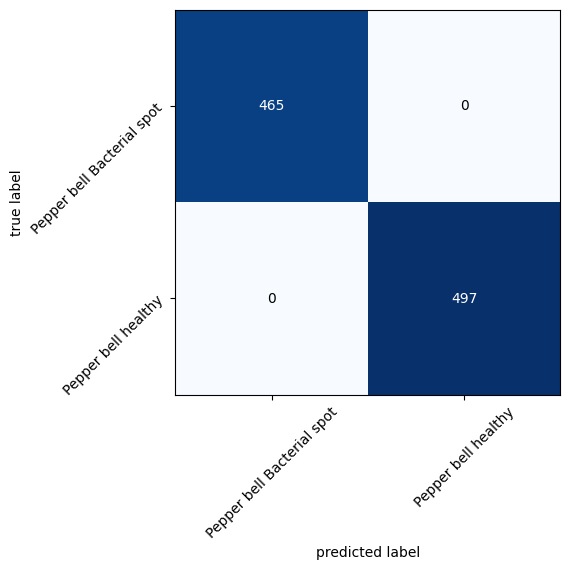

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [45]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## DIY Version 1 Bell-Paper Augmented

In [46]:
# Load model
DIY_Aug1 = tf.keras.models.load_model('Modelling/Bell-Paper/Augmented/Saved Model/BellPaper_DIY_model1_Based_Augmented')

In [47]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug1 = DIY_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug1[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 2s 28ms/step - loss: 0.0022 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.217867%


==========================Confusion Matrix====================
49/49 [==============================] - 1s 28ms/step


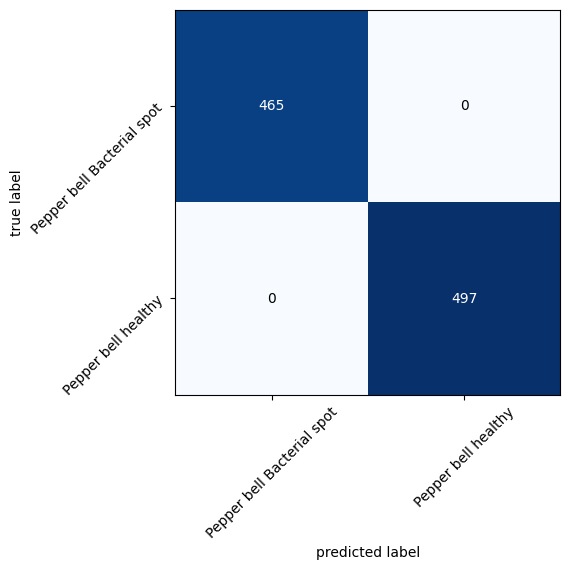

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [48]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## DIY Version 2 Bell-Paper Augmented

In [49]:
# Load model
DIY_Aug2 = tf.keras.models.load_model('Modelling/Bell-Paper/Augmented/Saved Model/BellPaper_DIY_model2_Based_Augmented')

In [50]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug2 = DIY_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug2[0]*100))

==========================Evaluate Model====================
49/49 [==============================] - 2s 27ms/step - loss: 0.0036 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.356253%


==========================Confusion Matrix====================
49/49 [==============================] - 1s 27ms/step


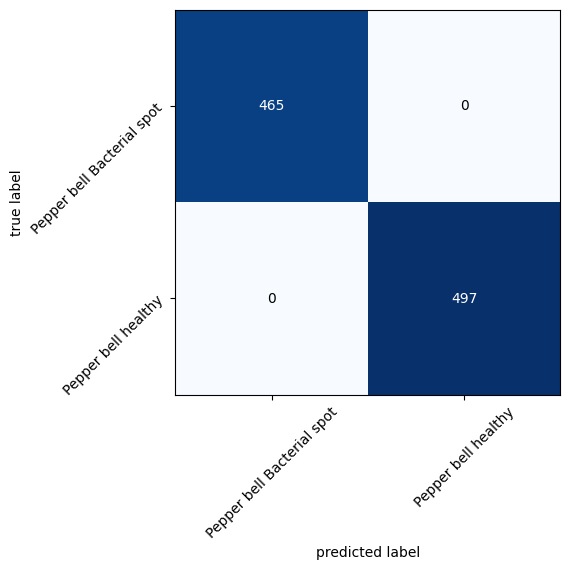

==========================Classification Report====================
Classification Report
                            precision    recall  f1-score   support

Pepper bell Bacterial spot       1.00      1.00      1.00       465
       Pepper bell healthy       1.00      1.00      1.00       497

                  accuracy                           1.00       962
                 macro avg       1.00      1.00      1.00       962
              weighted avg       1.00      1.00      1.00       962



In [51]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Compare All

In [54]:
# Make dictionary of all models
models = {
    "Dense_Non_Aug1": Dense_Non_Aug1,
    "Dense_Non_Aug2": Dense_Non_Aug2,
    "Mobile_Non_Aug1": Mobile_Non_Aug1,
    "Mobile_Non_Aug2": Mobile_Non_Aug2,
    "DIY_Non_Aug1": DIY_Non_Aug1,
    "DIY_Non_Aug2": DIY_Non_Aug2,
    "Xception_Non_Aug1": Xception_Non_Aug1,
    "Xception_Non_Aug2": Xception_Non_Aug2,
    "Dense_Aug1": Dense_Aug1,
    "Dense_Aug2": Dense_Aug2,
    "Mobile_Aug1": Mobile_Aug1,
    "Mobile_Aug2": Mobile_Aug2,
    "Xception_Aug1": Xception_Aug1,
    "Xception_Aug2": Xception_Aug2,
    "DIY_Aug1": DIY_Aug1,
    "DIY_Aug2": DIY_Aug2
}

# Make dictionary of all accuracy scores
accuracy = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[1],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[1],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[1],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[1],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[1],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[1],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[1],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[1],
    "Dense_Aug1": scores_Dense_Aug1[1],
    "Dense_Aug2": scores_Dense_Aug2[1],
    "Mobile_Aug1": scores_Mobile_Aug1[1],
    "Mobile_Aug2": scores_Mobile_Aug2[1],
    "Xception_Aug1": scores_Xception_Aug1[1],
    "Xception_Aug2": scores_Xception_Aug2[1],
    "DIY_Aug1": scores_DIY_Aug1[1],
    "DIY_Aug2": scores_DIY_Aug2[1]
}

# Make dictionary of all loss scores
loss = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[0],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[0],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[0],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[0],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[0],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[0],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[0],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[0],
    "Dense_Aug1": scores_Dense_Aug1[0],
    "Dense_Aug2": scores_Dense_Aug2[0],
    "Mobile_Aug1": scores_Mobile_Aug1[0],
    "Mobile_Aug2": scores_Mobile_Aug2[0],
    "Xception_Aug1": scores_Xception_Aug1[0],
    "Xception_Aug2": scores_Xception_Aug2[0],
    "DIY_Aug1": scores_DIY_Aug1[0],
    "DIY_Aug2": scores_DIY_Aug2[0]
}

# Make dataframe of all models, accuracy and loss
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values())), columns =['Model', 'Accuracy', 'Loss'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model  Accuracy      Loss
2     Mobile_Non_Aug1  1.000000  0.000050
3     Mobile_Non_Aug2  1.000000  0.001048
9          Dense_Aug2  1.000000  0.002050
10        Mobile_Aug1  1.000000  0.000179
11        Mobile_Aug2  1.000000  0.000706
12      Xception_Aug1  1.000000  0.001602
13      Xception_Aug2  1.000000  0.012213
14           DIY_Aug1  1.000000  0.002179
15           DIY_Aug2  1.000000  0.003563
1      Dense_Non_Aug2  0.998960  0.003093
6   Xception_Non_Aug1  0.998960  0.002841
7   Xception_Non_Aug2  0.998960  0.002909
8          Dense_Aug1  0.998960  0.005044
0      Dense_Non_Aug1  0.997921  0.008506
4        DIY_Non_Aug1  0.987526  0.043474
5        DIY_Non_Aug2  0.982328  0.079027


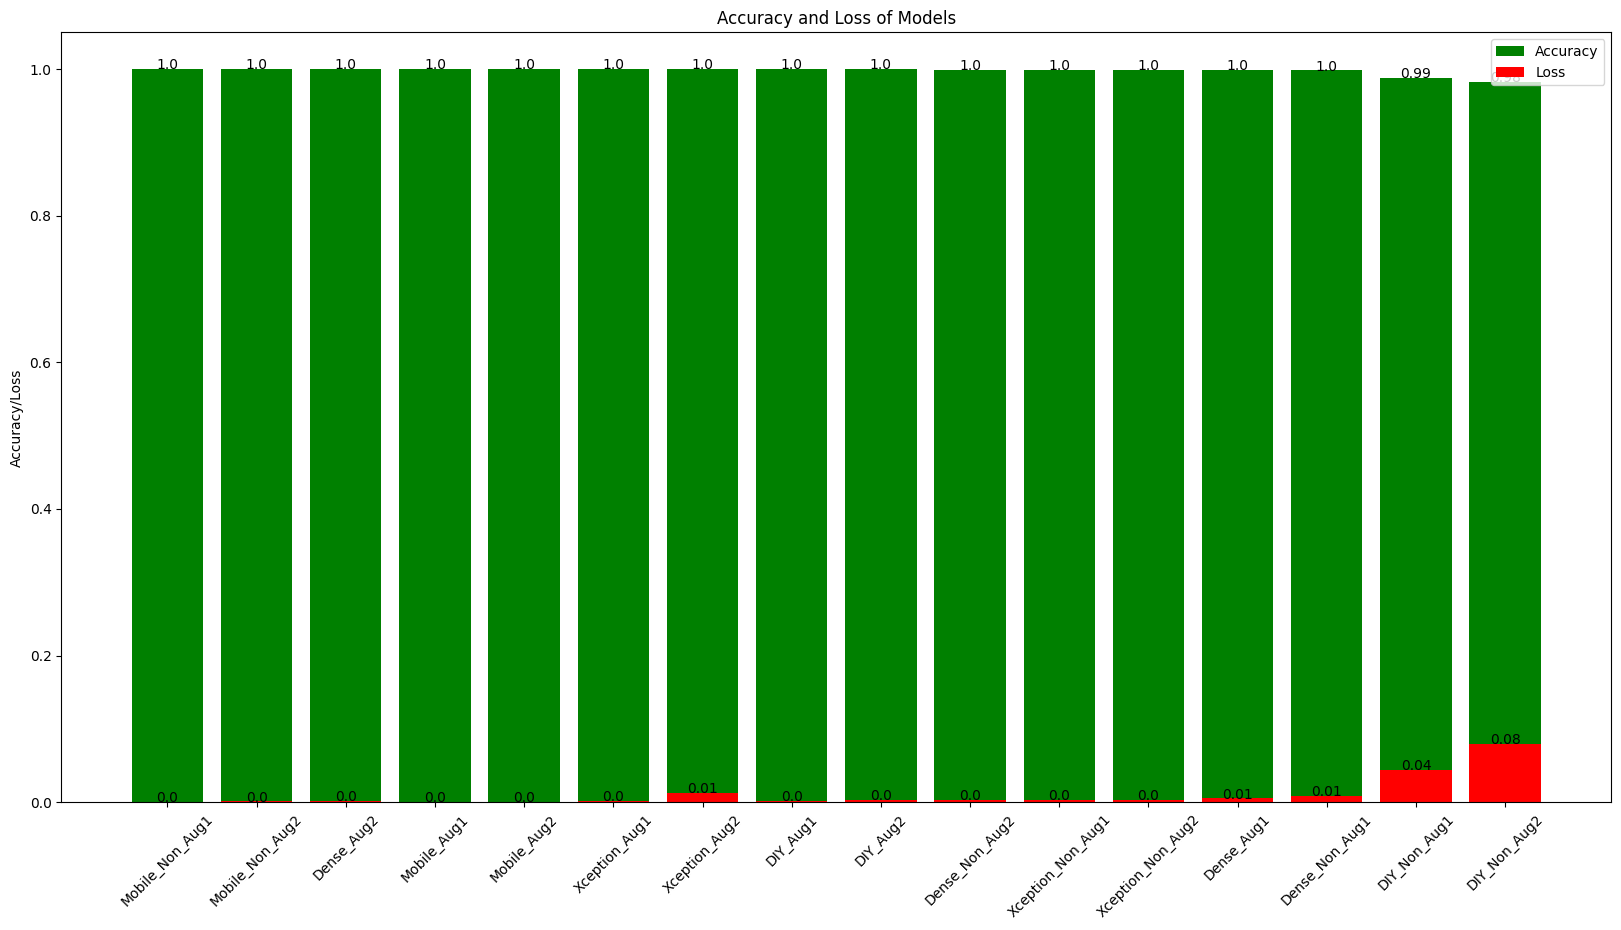

In [55]:
# Make bar chart of all models, accuracy and loss with annotations
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df['Model'], df['Accuracy'], color='green')
ax.bar(df['Model'], df['Loss'], color='red')
ax.set_xticklabels(df['Model'], rotation=45)
ax.set_ylabel('Accuracy/Loss')
ax.set_title('Accuracy and Loss of Models')
ax.legend(['Accuracy', 'Loss'])
for i, v in enumerate(df['Accuracy']):
    ax.text(i, v, str(round(v, 2)), color='black', ha="center")
for i, v in enumerate(df['Loss']):
    ax.text(i, v, str(round(v, 2)), color='black', ha="center")
plt.show()